In [2]:
!pip install sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [364]:
X, y = datasets.make_regression(n_samples=1_000, n_features=1, noise=3, shuffle=True)

In [365]:
ones = [[1]]*X.shape[0]

In [367]:
X = np.hstack((ones, X))

In [368]:
X

array([[ 1.        , -0.56401945],
       [ 1.        ,  0.93423904],
       [ 1.        , -0.75293376],
       ...,
       [ 1.        , -0.23527031],
       [ 1.        ,  0.1137517 ],
       [ 1.        , -0.20000978]])

In [369]:
# test and train data sizes
train_size = 700
test_size = 300

# split the data into training/testing sets
X_train = X[:-train_size]
X_test = X[-test_size:]

# split the targets into training/testing sets
y_train = y[:-train_size]
y_test = y[-test_size:]

In [370]:
def  cost(w, X, y):

    N = len(y)

    predictions = X.dot(w)

    cost = (1/2*N) * np.sum(np.square(predictions-y))

    return cost

In [379]:
def gradient_descent(X, y, w, learning_rate=0.001, iterations=10000):
    N = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):

        prediction = np.dot(X,w)

        w = w -(1/N)*learning_rate*( X.T.dot((prediction - y)))
        cost_history[it]  = cost(w, X, y)

    return w, cost_history

In [380]:
w = [np.random.random(), np.random.random()]#, np.random.random()]
w, cost_history = gradient_descent(X_train,  y_train, w)


print('w0:          {:0.3f},\w1:          {:0.3f}'.format(w[0],w[0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

w0:          -0.252,\w1:          -0.252
Final cost/MSE:  386882.833


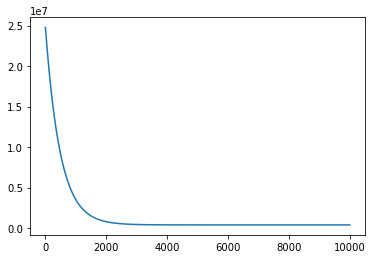

In [381]:
plt.plot([i for i in range(10000)], cost_history)

In [322]:
predictions = np.dot(X_test, w)

<ipython-input-382-9b969fb4a9ec>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


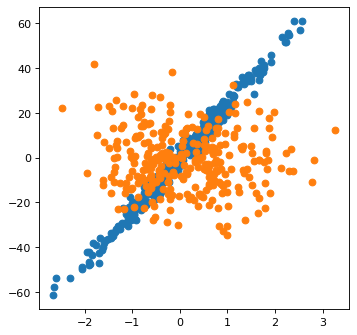

In [382]:
fig = plt.figure(figsize=(5, 5), dpi=80)
ax = fig.add_subplot()
ax.scatter(X_train[:, 1], y_train)
ax = fig.add_subplot()
ax.scatter(X_test[:, 1], predictions)


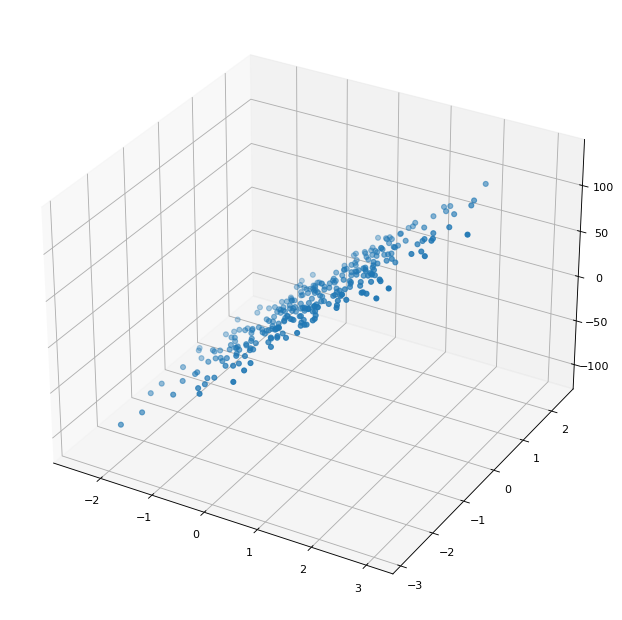

In [43]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train)

In [46]:
mu = []
std = []

def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))
    return data

X_train = normalize(X_train)

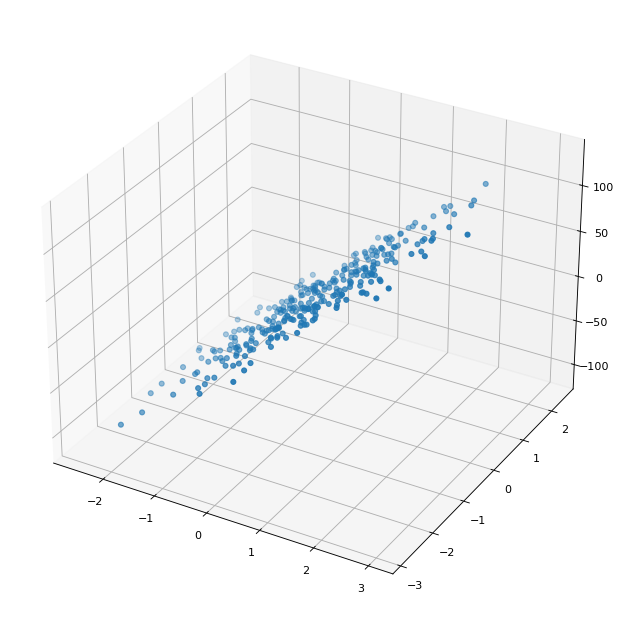

In [47]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train)

In [352]:
train = pd.read_csv('train.csv')

In [353]:
test = pd.read_csv('test.csv')

In [354]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
